In [1]:
import numpy as np 
import pandas as pd 
!pip install kmodes

In [2]:
data=pd.read_csv("/kaggle/input/grocery-product-prices-for-australian-states/Australia_Grocery_2022Sep.csv")
data.drop(["Postal_code","RunDate","Product_Url","tid","state","index"], axis=1,inplace=True)

In [3]:
df=data.dropna()
df=df.reset_index(drop=True)
df.head(2)

,Category,Sub_category,Product_Group,Product_Name,Package_price,Price_per_unit,package_size,is_estimated,is_special,in_stock,Retail_price,Brand,Sku,unit_price,unit_price_unit,city
0,Meat & seafood,Poultry,Drumsticks & maryland,RSPCA Approved Chicken Drumsticks,7.0,$3.50 per 1Kg,2kg,0,1,False,8.0,Coles,2263260P,3.5,1Kg,TEMPE
1,Meat & seafood,Beef & veal,Beef steaks,Beef Chuck Casserole Steak,17.1,$18.00 per 1Kg,approx. 950g,1,1,False,19.0,Coles,3331172P,18.0,1Kg,TEMPE


# K-modes

In [4]:
from kmodes.kprototypes import KPrototypes
categorical_features_idx = [0,1,2,3,5,6,9,11,12,14,15]
data=data.dropna()
data=data.reset_index(drop=True)
mark_array=data.values

In [5]:
kproto = KPrototypes(n_clusters=4, verbose=2, max_iter=10).fit(mark_array, categorical=categorical_features_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/10, moves: 745, ncost: 423830.668554821
Run: 1, iteration: 2/10, moves: 216, ncost: 404726.12103959476
Run: 1, iteration: 3/10, moves: 170, ncost: 366691.2763027591
Run: 1, iteration: 4/10, moves: 133, ncost: 348276.7669872346
Run: 1, iteration: 5/10, moves: 98, ncost: 342896.09943425463
Run: 1, iteration: 6/10, moves: 54, ncost: 340053.3380592232
Run: 1, iteration: 7/10, moves: 33, ncost: 339278.028588439
Run: 1, iteration: 8/10, moves: 0, ncost: 339278.028588439
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/10, moves: 1754, ncost: 470824.9251766559
Run: 2, iteration: 2/10, moves: 1182, ncost: 452960.2906357785
Run: 2, iteration: 3/10, moves: 920, ncost: 442074.3687021007
Run: 2, iteration: 4/10, moves: 407, ncost: 437822.48576841934
Run: 2, iteration: 5/10

In [6]:
# Cluster Centroids
print(kproto.cluster_centroids_)

[['8.587742857142832' '0.10285714285714286' '0.7571428571428571'
  '10.136542857142787' '33.954685714285674' 'Meat & seafood' 'Cheese'
  'Nuts & trail mix' 'Natural Sliced Almonds' '$40.00 per 1Kg' '200g'
  'False' 'Coles' '5645739P' '1Kg' 'DEVONPORT']
 ['9.206593406593381' '0.01098901098901099' '0.8571428571428571'
  '10.53263736263735' '84.58021978022' 'Meat & seafood' 'Seafood'
  'Prepacked seafood' 'Tasmanian Smoked Salmon With A Hint Of Lemon'
  '$96.00 per 1Kg' '100g' 'False' 'Tassal' '3729736P' '1Kg' 'BRUNSWICK']
 ['17.546610526315803' '0.24421052631578946' '0.6378947368421053'
  '22.47877894736844' '6.546084210526302' 'Drinks' 'Soft drinks'
  'Soft drink cans' 'Free Range Pork Leg Roast Boneless' '$3.20 per 1L'
  '1kg' 'False' 'Coles' '2741871P' '1L' 'ILPARPA']
 ['4.252382711488731' '0.01791651274473587' '0.5700036941263391'
  '5.637210934613985' '3.031699298116004' 'Pantry'
  'Chips, crackers & snacks' 'Muesli bars & fruit snacks'
  'Chilli Potato Chips' '$1.43 per 100G' '500g

In [7]:
clusters = kproto.predict(mark_array, categorical=categorical_features_idx)
data['cluster'] = list(clusters)
data.head(2)

,Category,Sub_category,Product_Group,Product_Name,Package_price,Price_per_unit,package_size,is_estimated,is_special,in_stock,Retail_price,Brand,Sku,unit_price,unit_price_unit,city,cluster
0,Meat & seafood,Poultry,Drumsticks & maryland,RSPCA Approved Chicken Drumsticks,7.0,$3.50 per 1Kg,2kg,0,1,False,8.0,Coles,2263260P,3.5,1Kg,TEMPE,3
1,Meat & seafood,Beef & veal,Beef steaks,Beef Chuck Casserole Steak,17.1,$18.00 per 1Kg,approx. 950g,1,1,False,19.0,Coles,3331172P,18.0,1Kg,TEMPE,2


In [8]:
mark_array

array([['Meat & seafood', 'Poultry', 'Drumsticks & maryland', ..., 3.5,
        '1Kg', 'TEMPE'],
       ['Meat & seafood', 'Beef & veal', 'Beef steaks', ..., 18.0, '1Kg',
        'TEMPE'],
       ['Meat & seafood', 'Beef & veal', 'Slow cook & casserole beef',
        ..., 18.0, '1Kg', 'TEMPE'],
       ...,
       ['Drinks', 'Sports drinks', 'Sports drink', ..., 3.75, '1L',
        'CANBERRA CIVIC DOORDASH DUMMY'],
       ['Drinks', 'Sports drinks', 'Sports drink', ..., 3.75, '1L',
        'CANBERRA CIVIC DOORDASH DUMMY'],
       ['Drinks', 'Coffee Drinks', 'Mixes Coffee', ..., 0.5, '1Ea',
        'CANBERRA CIVIC DOORDASH DUMMY']], dtype=object)

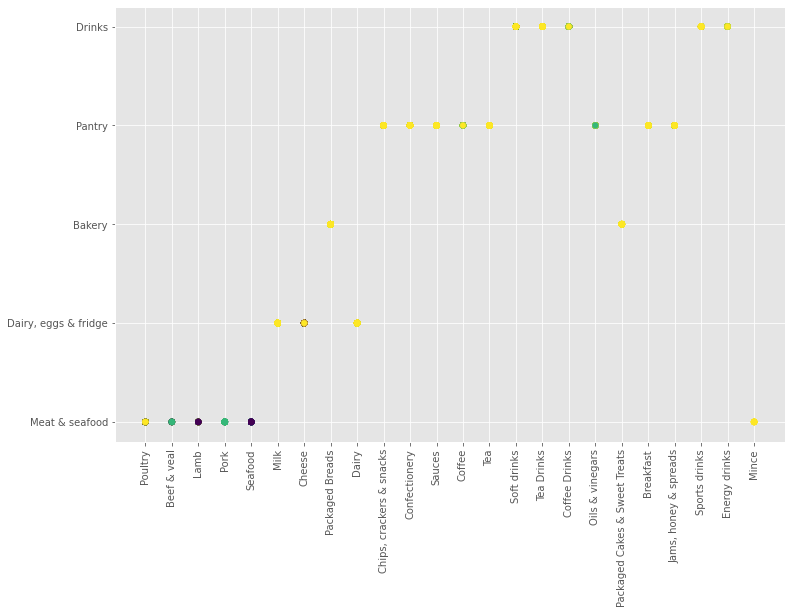

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use("ggplot")
plt.figure(figsize=(12,8))
plt.scatter(data.loc[:, "Sub_category"], data.loc[:,"Category"], c=clusters)
plt.xticks(rotation=90)
plt.show()

In [10]:
data.columns

Index(['Category', 'Sub_category', 'Product_Group', 'Product_Name',
       'Package_price', 'Price_per_unit', 'package_size', 'is_estimated',
       'is_special', 'in_stock', 'Retail_price', 'Brand', 'Sku', 'unit_price',
       'unit_price_unit', 'city', 'cluster'],
      dtype='object')

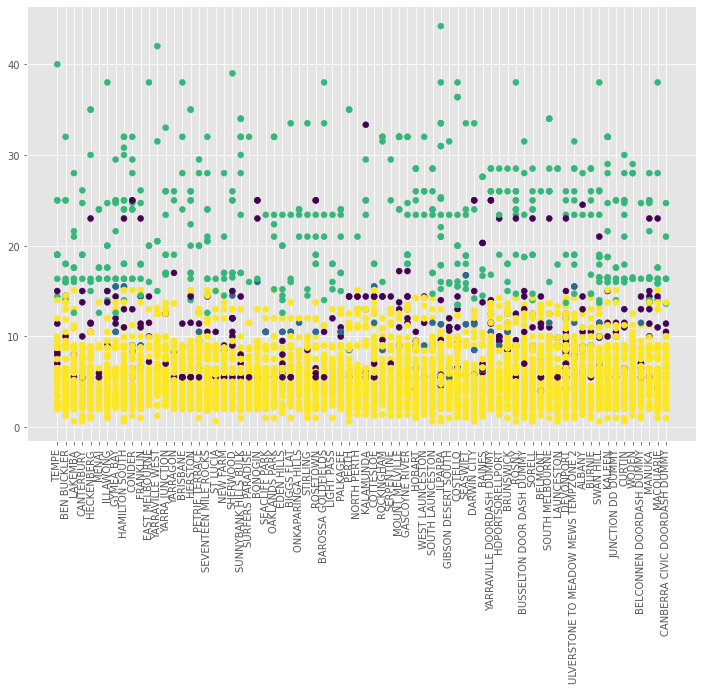

In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use("ggplot")
plt.figure(figsize=(12,8))
plt.scatter(data.loc[:, "city"], data.loc[:,"Retail_price"], c=clusters)
plt.xticks(rotation=90)
plt.show()

****

In [12]:
!pip install prince

In [13]:
from prince import MCA
mca = MCA(n_components = 2, n_iter = 3, random_state = 101)
mca.fit(df)
tips_mca = mca.transform(df)
tips_mca.head()

,0,1
0,0.504410,-0.090031
1,0.347847,-0.046580
2,0.346073,-0.045663
3,0.831763,-0.014896
4,0.416507,-0.043450


In [14]:
mca.explained_inertia_

[0.0015952984497622758, 0.0013930352833159375]

<AxesSubplot:title={'center':'Row and column principal coordinates'}, xlabel='Component 0 (0.16% inertia)', ylabel='Component 1 (0.14% inertia)'>

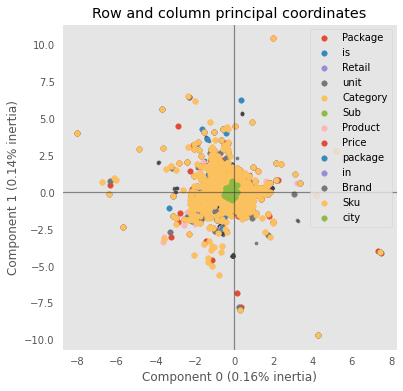

In [15]:
mca.plot_coordinates(X = df)

****

In [16]:
from prince import FAMD
famd = FAMD(n_components =2, n_iter = 3, random_state = 101)
famd.fit(df)
famd.transform(df)

,0,1
0,1.209512,-1.485559
1,4.943058,-2.070531
2,4.940606,-2.088163
3,4.051897,-3.226687
4,4.038019,-1.932120
...,...,...
6325,2.393345,1.873434
6326,0.957978,0.855829
6327,-0.693815,0.269378
6328,-0.695547,0.291124


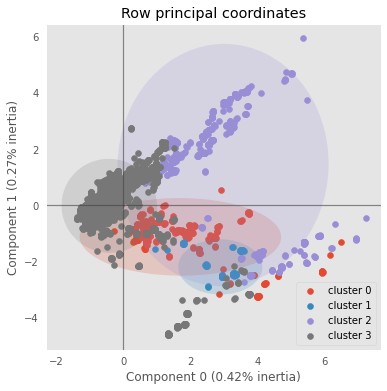

In [17]:
ax = famd.plot_row_coordinates(df,color_labels=['cluster {}'.format(t) for t in data['cluster']] )

In [18]:
famd.partial_row_coordinates(df)

Categorical              Numerical          
                0            1         0         1
0     8642.751611 -9758.922945  0.205784  0.250018
1     8482.224477 -8632.713318  5.167349 -0.850568
2     8433.535973 -8607.105628  5.167349 -0.850568
3     9026.947326 -9246.594291  4.061529 -2.401223
4     8680.616229 -8638.562833  3.943330 -1.432567
...           ...          ...       ...       ...
6325  2347.860251  6415.041849  2.768187  1.599567
6326  2341.463059  6896.501761  0.973726  0.708007
6327  1464.948937  6083.951572 -0.840802 -0.362480
6328  1467.939485  6084.180541 -0.840802 -0.362480
6329  1616.879609  5343.403657 -0.575489  0.182990

[6330 rows x 4 columns]

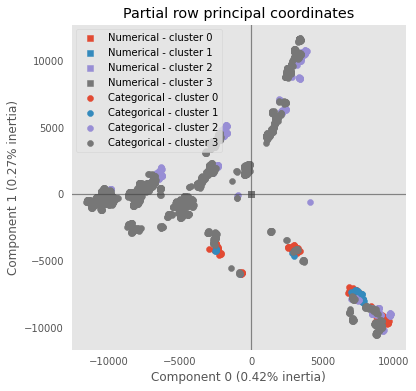

In [19]:
ax = famd.plot_partial_row_coordinates(df, color_labels=['cluster {}'.format(t) for t in data['cluster']])

****

![](https://miro.medium.com/max/828/1*WhKA9Jboj_1sHa0MbWQQ7w.webp)